# Proyecto señales y sistemas 2019-2
### Identificación de hablante utilizando transformada de Fourier

### Objetivo: 
Desarrollar un sistema de reconocimiento de hablante utilizando representación en frecuencia mediante transformada de Fourier y detección mediante distancia euclídea y de Mahalanobis.

## Nota: El siguiente cuaderno asume un solo hablante. Recuerde que cada grupo debe extender el entrenamiento para todos los integrantes del mismo, y generar un solo modelo.

### Paso 1: configuración lectura de micrófono en Python
Para capturar la información de audio desde el micrófono del computador se utilizará la librería [sounddevice](https://python-sounddevice.readthedocs.io/en/0.3.1/)

In [1]:
#instalación de librería sounddevice
!pip install sounddevice --user

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Captura del micrófono
Se captura un registro de audio sobre un solo canal, con una frecuencia de muestreo de 44100 Hz

In [2]:
import sounddevice as sd
def captura_registro(duration = 2,fs=44100,channels=1): # parámetros por defecto
    palabra = input("Ingrese identificador de palabra: ")
    input("Presione una tecla para iniciar registro... ")
    print('Grabando (%.2f seg)...' % duration)
    registro = sd.rec(int(duration * fs), samplerate=fs, channels=channels,  blocking=True)
    print('registro completo -- palabra: %s ' % palabra)
    return registro, palabra, fs #registro es un numpy array según el número de muestras capturadas

## Ejemplo captura de registro

In [3]:
a,palabra, fs = captura_registro()
a.shape

Ingrese identificador de palabra: hola
Presione una tecla para iniciar registro... 
Grabando (2.00 seg)...
registro completo -- palabra: hola 


(88200, 1)

### Para reproducir se utiliza el método play de la librería sounddevice. Debe ingresarse el numpy array y la frecuencia de muestreo utilizada

### Se presenta la señal en el tiempo y en la frecuencia

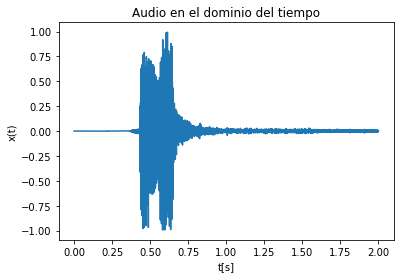

In [5]:
import matplotlib.pyplot as plt
import numpy as np

#reproducir audio
sd.play(a, fs)

#graficar audio en el dominio del tiempo
plt.plot(np.arange(a.shape[0])/fs,a) # el valor de t = #muestra/fs
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.title('Audio en el dominio del tiempo')
plt.show()

#graficar en frecuencia utilizando rfft de numpy
vf = np.fft.rfftfreq(a.shape[0],1/fs)
Xw = np.fft.rfft(a,axis=0) #axis = 0 para ejecutar fourier por columna de a
plt.plot(vf,abs(Xw)) # el valor de t = #muestra/fs
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.title('Audio en el dominio de la frecuencia')
plt.show()

### Paso 2: Generación de base de datos 
Cada grupo deberá escoger por integrante una palabra de acceso. Como resultado se generá un archivo .data (por cada integrante) con los registros capturados en el dominio del tiempo y la frecuencia.

## Se presenta el ejemplo para un integrante con palabra clave "sistemas".

La siguiente función realiza N capturas de audio.

In [ ]:
#función para capturar N registros
def N_captura_registros(N=30,duration = 2,fs=44100,channels=1):# parámetros por defecto
    R = np.array([])
    palabra = np.array([])
    for n in range(N):
        print('Registro %d/%d \n'%(n+1,N))
        a,pal,fs = captura_registro(duration = 2,fs=44100,channels=1)
        #reproducir registro para verificar validez
        sd.play(a,fs)
        plt.figure(figsize=(3,3))
        plt.plot(np.arange(a.shape[0])/fs,a)
        plt.xlabel('t[s]')
        plt.ylabel('x(t)')
        plt.title('Registro %d/%d'% (n+1,N))
        plt.show()
        ap = input('Aprueba el registro? (s/n): ')
        if ap == 's': # si el registro es correcto se guarda
            if n == 0 : R = a; palabra = pal;
            else : R = np.append(R,a,axis=1); palabra = np.append(palabra,pal)
    return R,palabra,fs

### Ejemplo funcionamiento N_captura_registros

In [ ]:
R,palabra,fs = N_captura_registros(N=10)
print('\n Tamaño array R',R.shape)

### Paso 3: Caracterizar registros mediante Fourier

Cada registro de audio se caractiza mediante transformada de Fourier.

In [ ]:
vf = np.fft.rfftfreq(R.shape[0],1/fs)
XwR = np.fft.rfft(R,axis=0)
print('Tamaño array XwR',R.shape)

In [ ]:
from ipywidgets import interact,IntSlider
def pltR(n=0):
    sd.play(R[:,n],fs)
    tv = np.arange(R.shape[0])/fs
    plt.subplot(211)
    plt.plot(tv,R[:,n],label="Registro %d" % n)
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("x(t)",fontsize = 14)
    plt.title('Registro en el tiempo')
    plt.grid()
    plt.legend()
    
    plt.subplot(212)
    plt.plot(vf,abs(XwR[:,n]),label="Registro %d" % n)
    plt.xlabel("f[Hz]",fontsize = 14)
    plt.ylabel("|X(f)|",fontsize = 14)
    plt.title('Espectro registro')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return
interact(pltR,n=(0,R.shape[1]-1,1))

### Paso 4: Guardar datos generados en archivo pickle

Se genera el archivo .pkl en el directorio actual con los datos en el tiempo y la frecuencia en formato diccionario de Python.

In [ ]:
import pickle
filename = 'ent_sistemas'
dict = {'R' : R, 'XwR' : XwR, 'fs' : fs}
f = open(filename+".pkl","wb")
pickle.dump(dict,f)
f.close()

### Para cargarlos se utiliza el compando pickle.load

In [ ]:
f = open(filename+".pkl",'rb')
data = pickle.load(f)
data

Para acceder a algún elemento del diccionario:

In [ ]:
data['R'] 